In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Lecture 3 - Plotting *

---

### Content

1. Theory of Visualisation and EDA
2. Basic Plotting with Python
3. Graphs types
4. Summary statistics and box plots

\* [1] Data Analysis with Open Source Tools by Philipp K. Janert. Nearly all of the text, examples and datasets are directly sourced from the chapter 2 from the book.

\* [2] Some examples taken from http://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-on-a-secondary-y-axis

http://nb.bianp.net/sort/views/

http://shop.oreilly.com/product/9780596802363/ViewLarger.do?sortby=bestSellers

### Learning Outcomes

At the end of this lecture, you should be able to:

* describe the role visualisation and of EDA
* describe and list the primary plotting libraries available through Python
* plot univariate and multivariate data using a variety of graphs: histograms, KDEs, CDFs, scatter, box, line
* explain the pitfalls of relying on simply summary statistics
* apply appropriate graphs to given data types


---

# Visual representation of data

> **Data visualization is the graphical display of abstract information for two purposes: sense-making (also called data analysis) and communication.**

> Data visualization is only successful to the degree that it encodes information in a manner that our eyes can discern and our brains can understand. Getting this right is much more a science than an art, which we can only achieve by studying human perception. The goal is to translate abstract information into visual representations that can be easily, efficiently, accurately, and meaningfully decoded. 

To achieve this goal, the display should achieve the following:

*    Clearly indicates how the values relate to one another
*    Represents the quantities accurately
*    Makes it easy to compare the quantities
*    Makes it easy to see the ranked order of values, such as from the leading cause of death to the least
*    Makes obvious how people should use the information - what they should use it to accomplish - and encourages them to do this
    
Source: https://www.interaction-design.org/literature/book/the-encyclopedia-of-human-computer-interaction-2nd-ed/data-visualization-for-human-perception




    
    
> “Graphical excellence is that which gives to the viewer the greatest number of ideas in the shortest time with the least ink in the smallest space.”
― Edward R. Tufte, The Visual Display of Quantitative Information

## How not to do graphs

“Since the turn of the 21st century, data visualization has been popularized, too often in tragically ineffective ways as it has reached the masses through commercial software products.""




<img src=https://www.biostat.wisc.edu/~kbroman/topten_worstgraphs/cotter_fig2.jpg width=800>


<img src=https://www.interaction-design.org/images/encyclopedia/data_visualization_for_human_perception/three-dimensional-bar-chart-user-interface.jpg width=800>

<img src=https://public-media.interaction-design.org/images/encyclopedia/data_visualization_for_human_perception/pie-chart-distorted-causes-of-death.jpg width=800>


<img src=https://www.biostat.wisc.edu/~kbroman/topten_worstgraphs/roeder_fig4.jpg width=800>

## How we perceive visual cues 

Available visual encoding schemes:

<img src=../figures/imageEncodingSchemes.png width=800>

Accuracy of various visual encoding schemes for conveying quantitative data:

<img src=../figures/accuracyOfVisualPerception.png width=800>

Which data types map best to which visual encoding schemes:

<img src=../figures/mappingDataTypesToEncoding.png width=800>

Source: http://mkweb.bcgsc.ca/vizbi/2012/principles.pdf

Mackinlay, J. (1986). Automating the design of graphical presentations of relational information. Acm Transactions On Graphics (Tog), 5(2), 110-141.

## Some principles

> "Clutter and confusion are not attributes of data - they are shortcomings of design." ― Edward R. Tufte

<video controls alt="test" src='../figures/ImprobableFemaleBasenji.webm'>



> “There is no such thing as information overload. There is only bad design.“
― Edward R. Tufte


> “Above all else show the data.”
― Edward R. Tufte, The Visual Display of Quantitative Information


> “If the statistics are boring, then you've got the wrong numbers.”
― Edward R. Tufte


> “Clutter and confusion are failures of design, not attributes of information.”
― Edward R. Tufte


> “It is not how much empty space there is, but rather how it is used. It is not how much information there is, but rather how effectively it is arranged.”
― Edward R. Tufte 


> “Colour  used poorly is worse than no  colour  at all”
― Edward Tufte


## Exploratory Data Analysis

When examining data clouds, some of the **key characteristics** that need to be considered are:

1. the **location** of the data and its centre of mass
2. the **dispersion** or spread of the data
3. the **shape** of the data

The two graphs below gives a good indication of the above:

# Plotting with Python

matplotlib is the foundational and the most popular Python library for producing plots and other 2D data visualizations.

In [2]:
from IPython.display import HTML, IFrame
IFrame("http://matplotlib.org/", width=800, height=600)



The library is imported into your code as follows:

matplotlib is very powerful since all aspects of a figure can be controlled programmatically and is therefore highly suitable for generating figures particularly in scientific publications but also in business settings. This is important for reproducibility and convenient when one needs to regenerate a figure with updated data or modify its appearance. 

Despite its expressive power, matplotlib also has it's disadvantages. Firstly, because the library enables the user to tweak all aspects of the figures, the user is at first overwhelmed with the number of tunable knobs. Secondly, the default matplotlib figures are ugly. It takes a lot of effort (and knowledge) to make the figures aesthetically pleasing.

There are however a number of plotting libraries out there that use matplotlib under the hood, but provide the user with an easier interface to it, and importantly produce default figures which are visually much more appealing. Seaborn is one such library that we will be using.

In [3]:
from IPython.display import HTML, IFrame
IFrame("https://web.stanford.edu/~mwaskom/software/seaborn/index.html", width=1000, height=600)



Because seaborn uses matplotlib, the graphics can be further tweaked using matplotlib interfaces and rendered with any of the matplotlib backends to generate publication-quality figures.Examples:

<img src=../figures/bubble.png width=800>
<img src=../figures/seabornGraph.png width=800>
<img src="../figures/Usage of technologies amongst participants2.png" width=800>

An alternate library is pylab.

Pylab provides an interface that is very similar to MATLAB, therefore experienced users of MATLAB can make an easy transition to python plotting. We will only minimally make use of Pylab in order to set global appearance settings for the plotting environment.

Additionally, there is an interactive plotting environment called Bokeh.

In [4]:
IFrame("https://bokeh.pydata.org/en/latest/", width=1100, height=500)


---

---

# Plotting Univariate and Multivariate Data

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [6]:
import seaborn as sns


In [7]:
sns.set(style="ticks")
from pylab import rcParams


In [8]:
#don't forget this line
%matplotlib inline


In [9]:
matplotlib.style.use('ggplot')


Below is a set of tunable parameters for controlling the aesthetics of the graphs.

In [10]:
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'


In [11]:
#rcParams['figure.dpi'] = 350
#rcParams['lines.linewidth'] = 2
#rcParams['patch.edgecolor'] = 'white'
#rcParams['font.family'] = 'StixGeneral'


## Dataset 1 - Server Response Times

We begin with the example from [1], using a dataset called "ch02_serverdata" containing server response times to requests in milliseconds.

Load the data into a data frame.

In [12]:
server_data = pd.read_table("../datasets/ch02_serverdata",header=None)
server_data.head(10)

,0
0,452.42
1,318.58
2,144.82
3,129.13
4,1216.45
5,991.56
6,1476.69
7,662.73
8,1302.85
9,1278.55


Get some info on the data type and the number of samples.

In [13]:
server_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
0    1000 non-null float64
dtypes: float64(1)
memory usage: 7.9 KB


The column had no header so let's see what the default column name is in the data frame.

In [14]:
server_data.columns


Int64Index([0], dtype='int64')

## Dataset 2 - Wine

In [15]:
#wine_data = pd.read_csv("wine_data.csv")
wine_data = pd.io.parsers.read_csv(
    '../datasets/wine_data.csv',
     usecols=[0,1,2,3,4,5]
    )
wine_data.columns=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium']
wine_data.head(10)


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium
0,1,14.23,1.71,2.43,15.6,127
1,1,13.20,1.78,2.14,11.2,100
2,1,13.16,2.36,2.67,18.6,101
3,1,14.37,1.95,2.50,16.8,113
4,1,13.24,2.59,2.87,21.0,118
5,1,14.20,1.76,2.45,15.2,112
6,1,14.39,1.87,2.45,14.6,96
7,1,14.06,2.15,2.61,17.6,121
8,1,14.83,1.64,2.17,14.0,97
9,1,13.86,1.35,2.27,16.0,98


In [16]:
wine_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 6 columns):
Class                178 non-null int64
Alcohol              178 non-null float64
Malic acid           178 non-null float64
Ash                  178 non-null float64
Alcalinity of ash    178 non-null float64
Magnesium            178 non-null int64
dtypes: float64(4), int64(2)
memory usage: 8.4 KB


In [17]:
wine_data.describe()


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000


## Dataset 3 - Tips

In [18]:
# Load the example tips dataset
tips = sns.load_dataset("tips")
tips['percentage'] = tips.tip / tips.total_bill * 100.0

tips

,total_bill,tip,sex,smoker,day,time,size,percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
5,25.29,4.71,Male,No,Sun,Dinner,4,18.623962
6,8.77,2.00,Male,No,Sun,Dinner,2,22.805017
7,26.88,3.12,Male,No,Sun,Dinner,4,11.607143
8,15.04,1.96,Male,No,Sun,Dinner,2,13.031915
9,14.78,3.23,Male,No,Sun,Dinner,2,21.853857


In [19]:
print(tips.info())
tips.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
percentage    244 non-null float64
dtypes: category(4), float64(3), int64(1)
memory usage: 9.1 KB
None


,total_bill,tip,sex,smoker,day,time,size,percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


We need to get a feel for the data and this can be best achieved visually.

# Basic Plotting 

Plotting methods allow for a handful of plot styles other than the default Line plot. These methods can be provided as the kind keyword argument to plot(). These include:

    ‘bar’ or ‘barh’ for bar plots
    ‘hist’ for histogram
    ‘box’ for boxplot
    ‘kde’ or 'density' for density plots
    ‘area’ for area plots
    ‘scatter’ for scatter plots
    ‘hexbin’ for hexagonal bin plots
    ‘pie’ for pie plots


Calling plot on both dataframes will give us line graphs which use the index as the x-axis and each of the columns as y-axis values. This type of plot assumes a temporal relationship between each of the observations, which in our case is meaningless. We therefore need something more informative. 

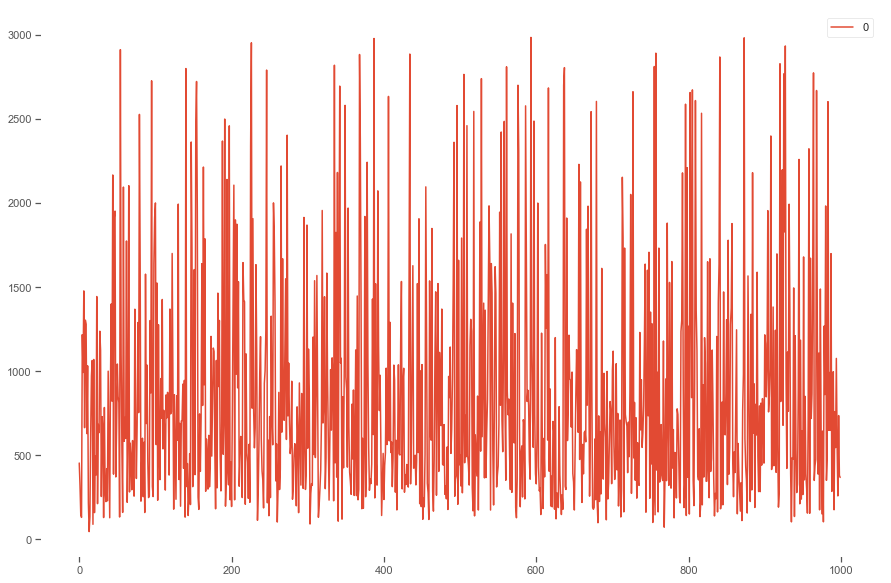

In [20]:
server_data.plot()


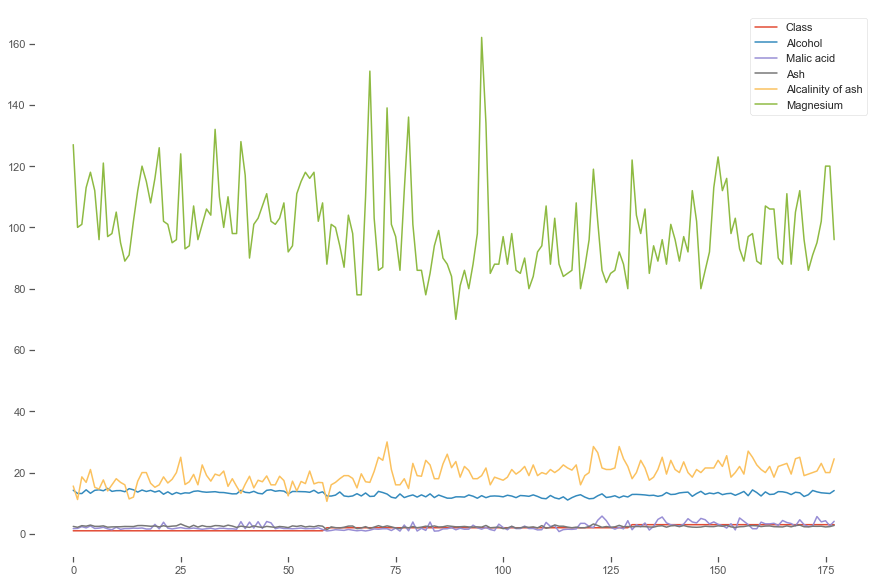

In [21]:
wine_data.plot()


## Histograms

Frequenly it is useful to look at the distribution of data before you do anything to it. Histograms are a kind of bar graph that displays relative frequencies of data values; hence, the y-axis is always some measure of frequency. This can either be raw counts of values or scaled proportions. Histograms tend to be very good beginning points for EDA.

However, they are weak on providing intuition, and crucially, they do not easily convey quantitative information from the graph. This is particularly amplified on larger datasets.

A more informative graph type is needed.

Histograms divide the range of values into a set of “bins” and then count the number of points that fall into each bin.

The count for each bin is then plotted as a function of the position of the bin on the x-axis.

,0
1,318.58
2,144.82
3,129.13
4,1216.45
5,991.56
6,1476.69
7,662.73
8,1302.85
9,1278.55
10,627.65


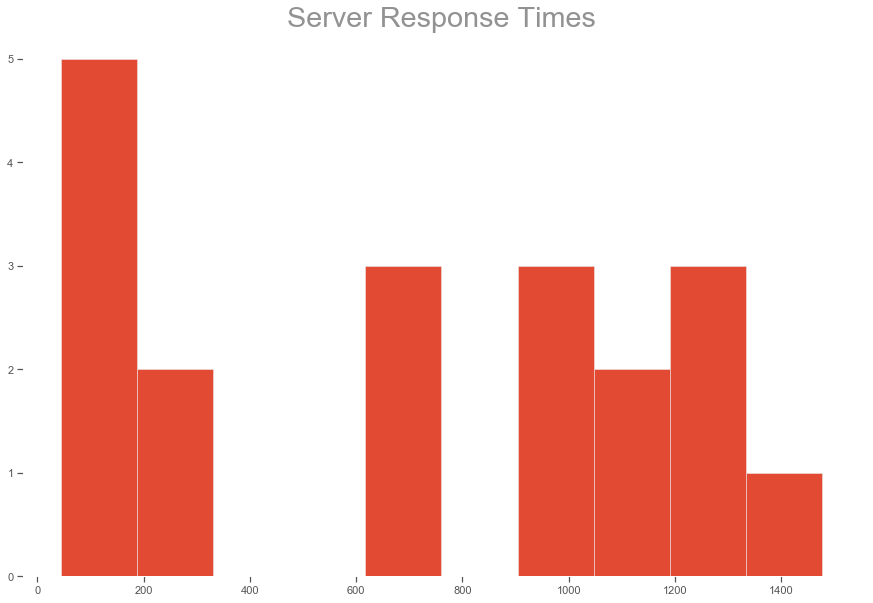

In [22]:
server_data[1:20].hist()
plt.title("Server Response Times", alpha=0.5)

server_data[1:20]

The above histogram is rendered using default settings. The quality of any histogram hinges on the proper choice of bin width. Making width too large results in losing too much detailed information about the data set. If too small, then the shape of the distribution will not be discernible.

Unfortunately, there is no simple rule of thumb exists to predict a perfect bin width for a given data set. Usually several different values for the bin width must be experimented with until a satisfactory result is obtained. Sometimes a rough guideline for determining the bins size is the square root on the dataset size.

Below shows a histogram of this data set with the horizontal axis divided into 60 bins of 50 milliseconds width.

Text(0.5, 1.0, 'Server Response Times')

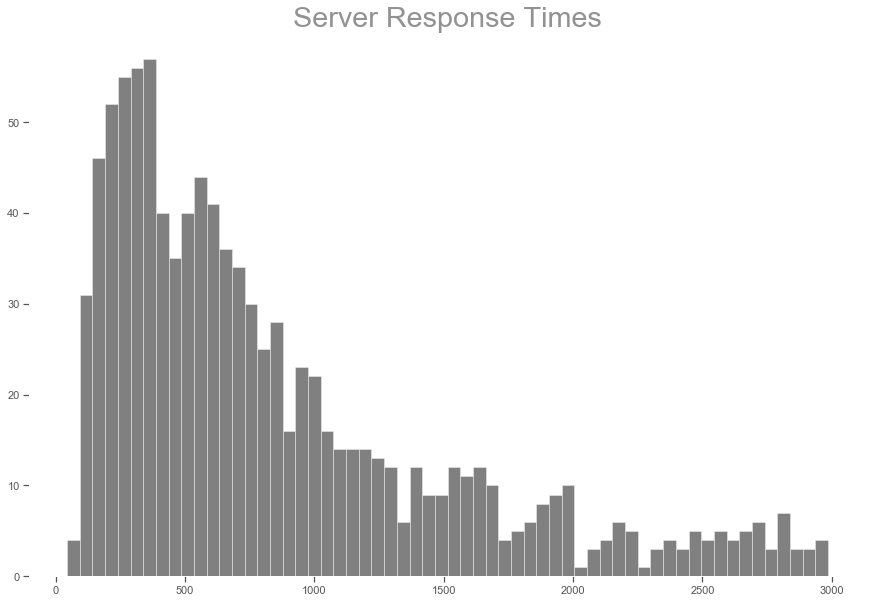

In [23]:
server_data.hist(bins=60,facecolor='grey')
plt.title("Server Response Times", alpha=0.5)


**Exercise:** Experiment with several different values for the bins parameter. 

Try using the square root of the dataset size as a parameter. 

Which do you think is more informative? Why?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022FA0554AC8>]],
      dtype=object)

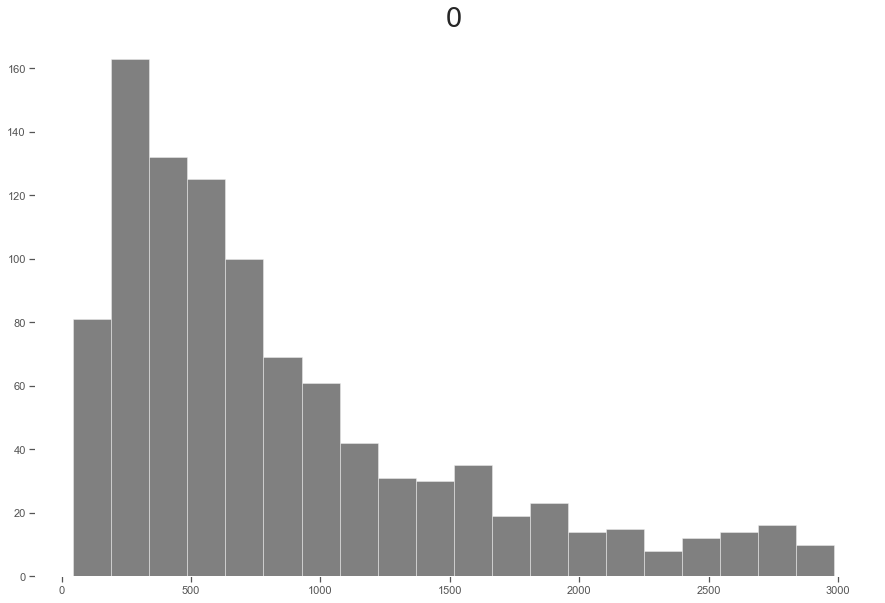

In [24]:
server_data.hist(bins=20,facecolor='grey')

The histogram tells us that:

1. There is a rather sharp cut-off at a non zero value on the left, which means that there is a minimum completion time below which no request can be completed. 
2. Then there is a sharp rise to a maximum at the “typical” response time, and finally there is a relatively large tail on the right, corresponding to the smaller number of requests that take a long time to process.  

Key point: it is important to realize that **a data set does not determine a histogram uniquely**. Instead, it is largely the bin width (and to some degree the alignment of the bins) which influence the shape of a histogram.

We can rescale any of the axes as required. Careful when performing this. 

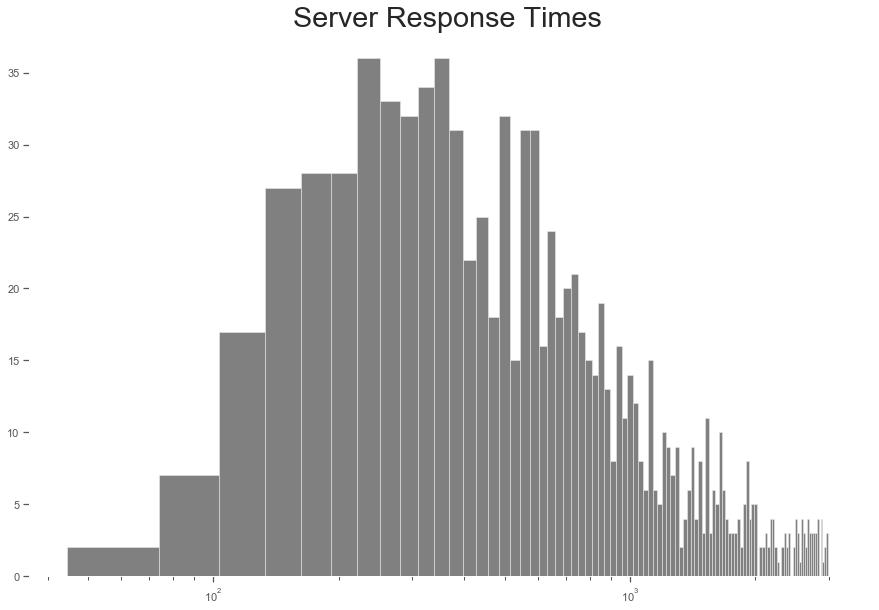

In [25]:
server_data.hist(bins=100,facecolor='grey')
plt.title("Server Response Times")
plt.xscale('log')


Text(0.5, 1.0, 'Server Response Times')

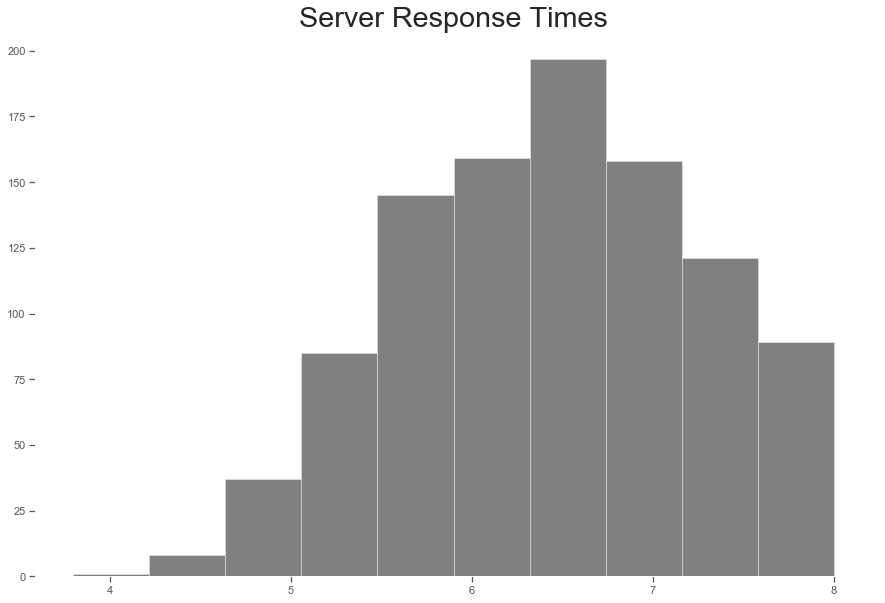

In [26]:
plt.hist(np.log(server_data[0]),facecolor='grey')
plt.title("Server Response Times")


While histograms are common and possess an intuitive interpretation, they also have some serious limitations [1]:

1. The binning process required by all histograms **loses information** (by replacing the location of individual data points with a bin of finite width). If we only have a few data points, we can ill afford to lose any information.

2. Histograms are **not unique**. The appearance of a histogram can be quite different depending on the settings. (This non uniqueness is a direct consequence of the information loss described in the previous item.)

3. On a more superficial level, histograms are **ragged and not **. This matters little if we just want to draw a picture of them, but if we want to feed them back into a computer as input for further calculations, then a smooth curve would be easier to handle.

4. Histograms **do not handle outliers gracefully**. A single outlier, far removed from the majority of the points, requires many empty cells in between or forces us to use bins that are too wide for the majority of points. It is the possibility of outliers that makes it difficult to find an acceptable bin width in an automated fashion.

There is an alternative to classical histograms that has none of these problems which we will look at later.

In the multivariate case, we can get a sense of the distribution of the values for all of the variables at once (if there are not too many).

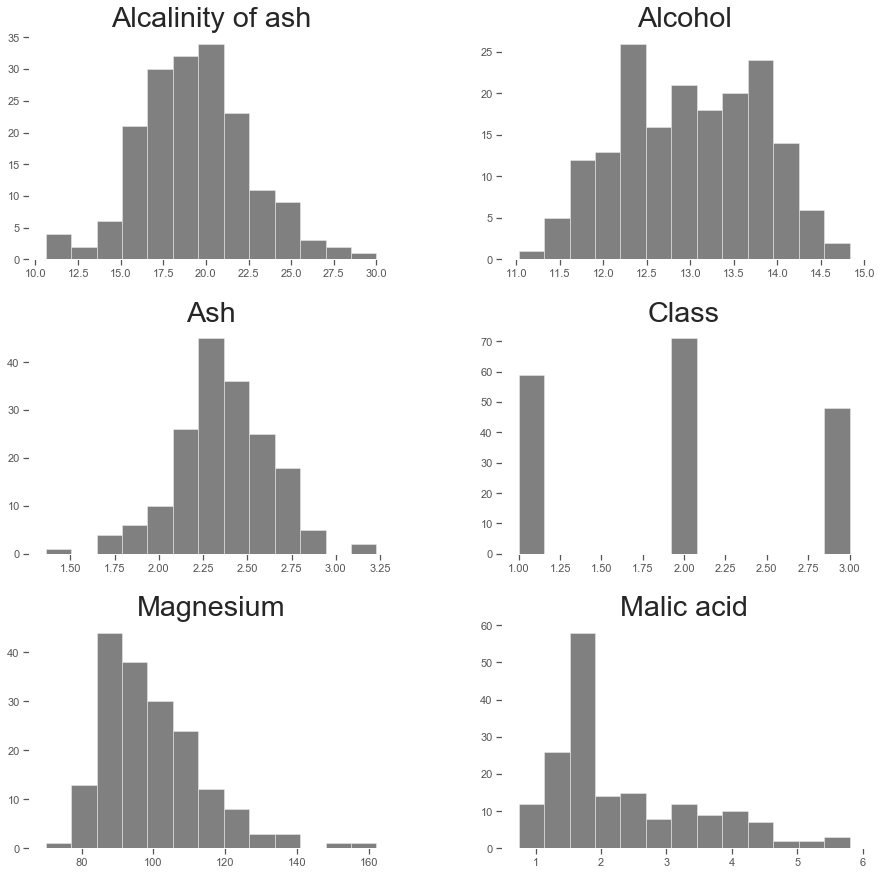

In [27]:
_ = wine_data.hist(bins=int(np.sqrt(len(wine_data))),facecolor='grey', figsize=(15, 15))

Given that we are dealing with a classification dataset, it makes sense to examine the distributions for various features by class label as follows:

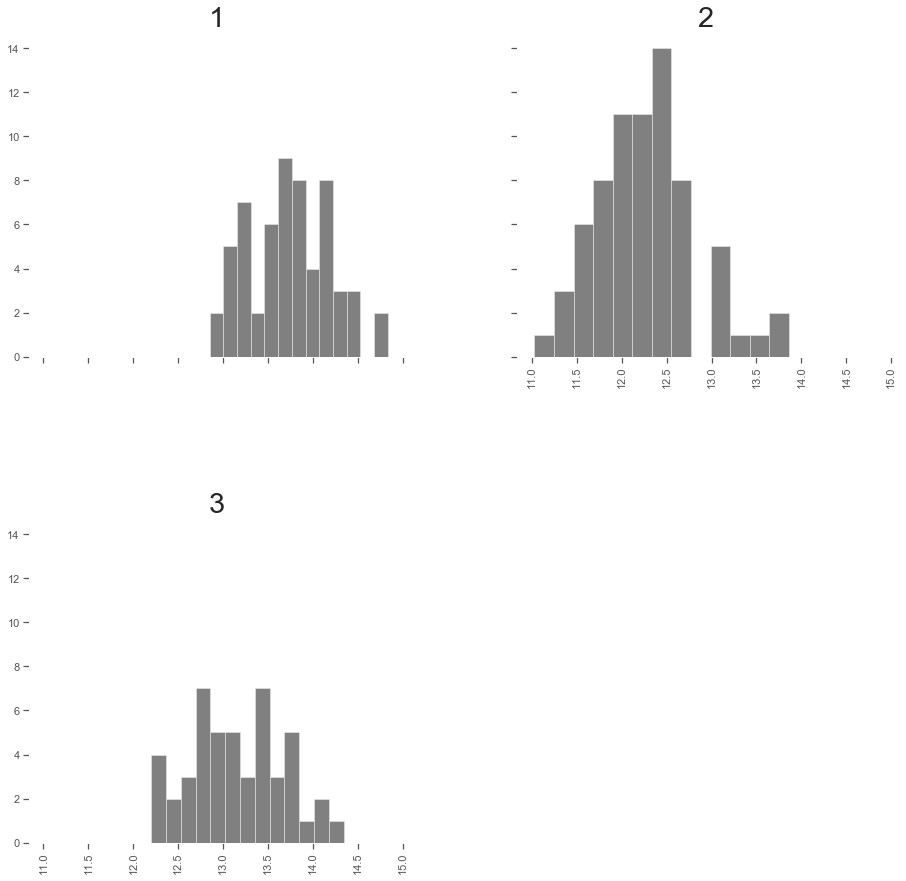

In [28]:
_ = wine_data['Alcohol'].hist(by=wine_data['Class'], figsize=(15, 15), sharey=True, sharex=True, bins=int(np.sqrt(len(wine_data))), color='grey')

**Exercise:** Select the 'Malic acid' feature and generate a histogram for each of the class labels:

The FacetGrid class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. 

The main approach for visualizing data on this grid is with the FacetGrid.map() method. Provide it with a plotting function and the name(s) of variable(s) in the dataframe to plot. 

Let’s look at the distribution of tip percentages according to smoker status using a histogram.

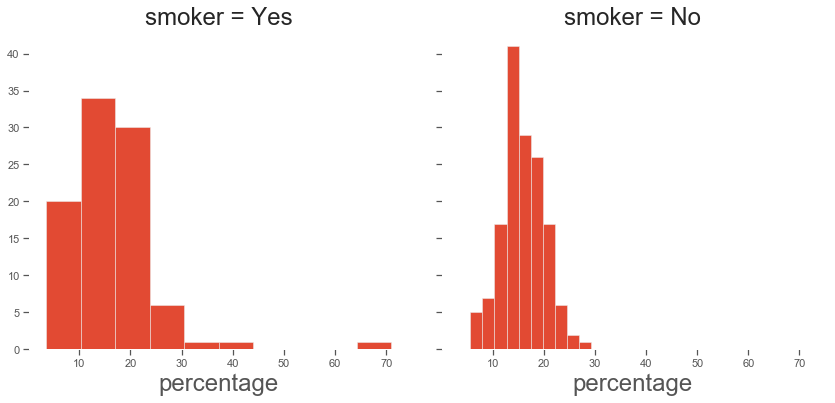

In [29]:
g = sns.FacetGrid(tips, col="smoker", height=6)
g.map(plt.hist, "percentage")


**Exercise:** Plot a FacetGrid figure depicting the distribution of tip percentages according to sex using a histogram.

We can use multiple features to generate separate plots: 

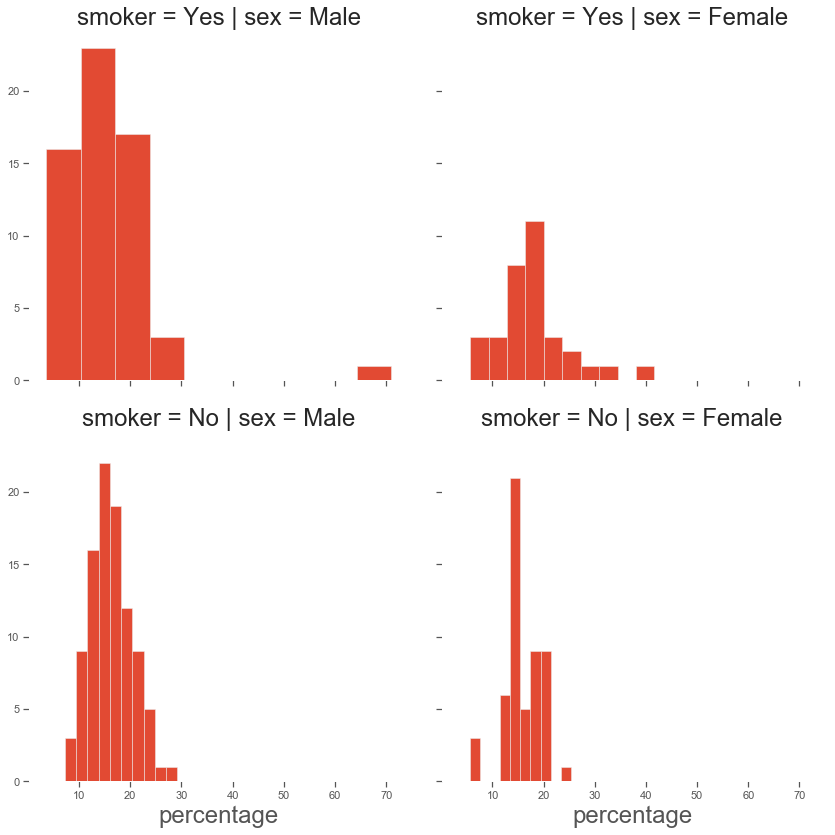

In [30]:
g = sns.FacetGrid(tips, row='smoker', col="sex", height=6)
g.map(plt.hist, "percentage")


### Kernel Density Estimates (KDEs) 

KDEs are a relatively new technique as they heavily rely on computing power to generate them.

To form a KDE, a kernel (a smooth, strongly peaked function) is placed at the
position of each data point. Then all the contributions from all kernels are added up to obtain a smooth curve which can be evaluated at any point along the x-axis.

In KDEs, both the **type of a kernel and the bandwidth are tunable parameter**s. Given data set and bandwidth, a **KDE is unique**; a KDE is also smooth, provided we have chosen a smooth kernel function, such as the Gaussian.

A KDE can be constructed directly from a data frame but it does not allow for tuning.

,0
0,452.42
1,318.58
2,144.82
3,129.13
4,1216.45
5,991.56
6,1476.69
7,662.73
8,1302.85
9,1278.55


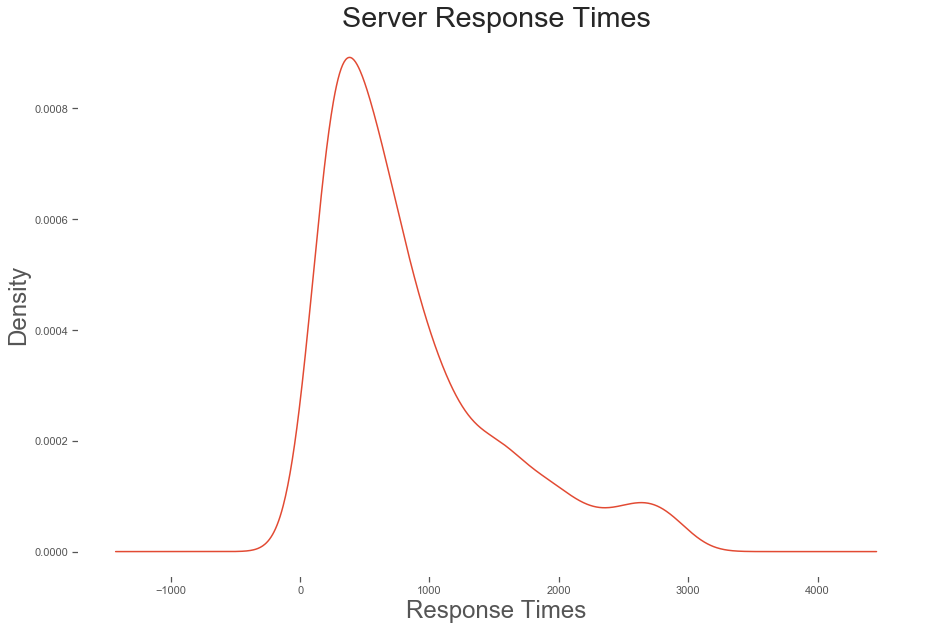

In [31]:
server_data[0].plot(kind='kde', title='Server Response Times', label='KDE pandas')
plt.xlabel('Response Times')
server_data

Seaborn has a tunable bandwidth for KDEs based on the Gaussian kernel.

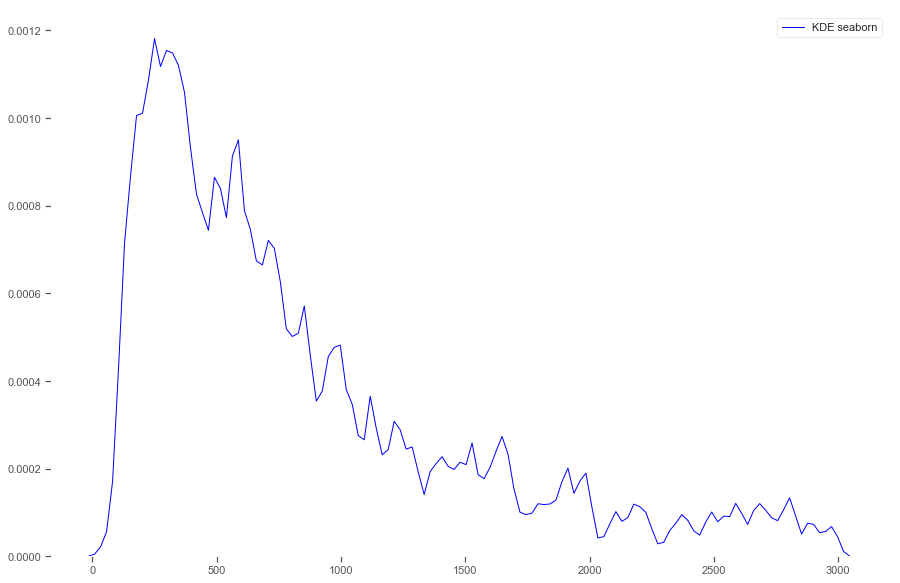

In [32]:
sns.kdeplot(server_data[0], bw=20, color='blue', lw=1.0, label='KDE seaborn')


The plots can be superimposed into a single figure if executed in the same block:

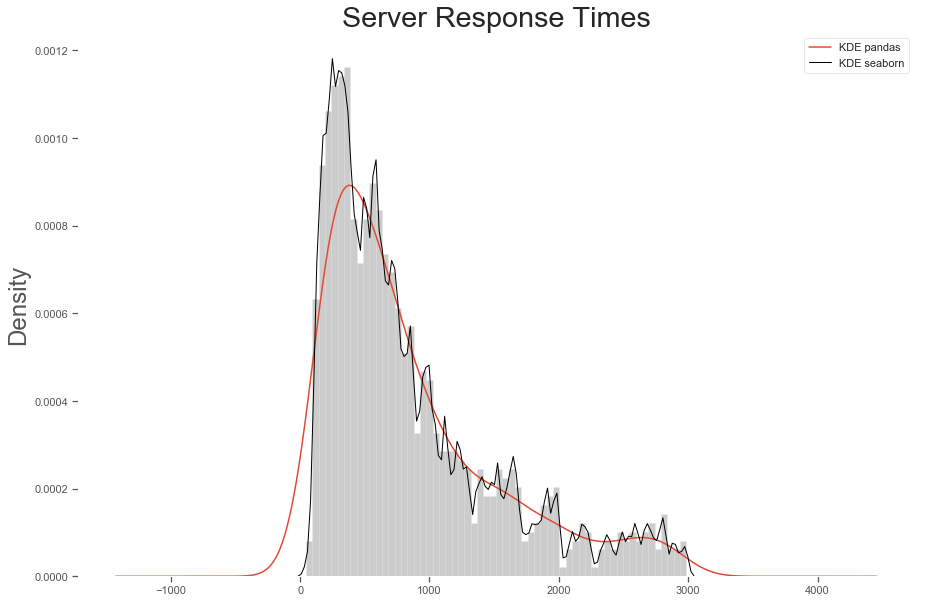

In [33]:
server_data.hist(bins=60, density=True, alpha=0.4, color='grey')
server_data[0].plot(kind='kde', title='Server Response Times', label='KDE pandas')
sns.kdeplot(server_data[0], bw=20, color='black', lw=1.0, label='KDE seaborn')

#server_data[0].hist(bins=100, normed=True)
#server_data[0].plot(kind='kde')


**Exercise:** Experiment with the bandwidth parameter for the seaborn KDE until you discover the parameter that matches the KDE rendered by matplotlib directly on the data frame object.

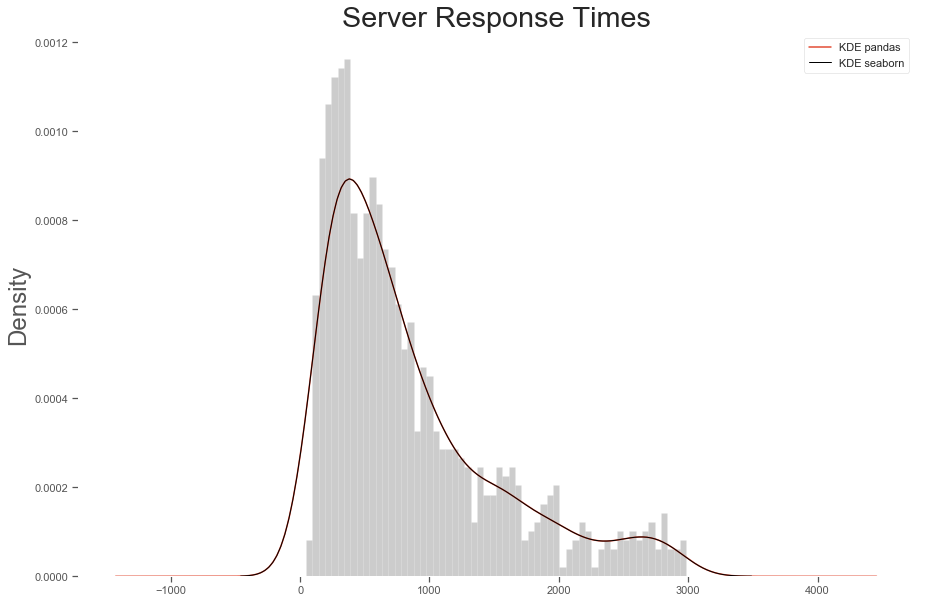

In [34]:
server_data.hist(bins=60, density=True, alpha=0.4, color='grey')
server_data[0].plot(kind='kde', title='Server Response Times', label='KDE pandas')
sns.kdeplot(server_data[0], bw=168, color='black', lw=1.0, label='KDE seaborn')


Seaborn provides a very nice short cut to the above with a single command:

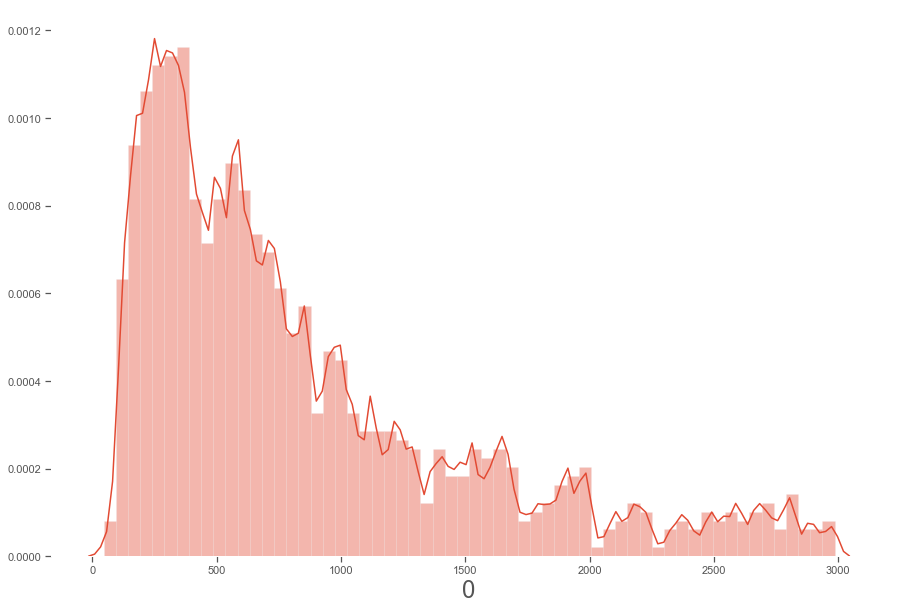

In [35]:
sns.distplot(server_data[0], bins=60, kde_kws={"bw": 20});


## The Cumulative Distribution Function (CDF)

The advantage of histograms and KDEs is that they have an **intuitive appeal**. They clearly **convey how probable it is to observe a data point with a given value**. 

From the above example, it is immediately clear that values around 250
milliseconds are very likely to occur, whereas values greater than 2,000 milliseconds are rare.

The question is, **how rare, exactly?**

That is much harder to answer by looking at a histogram in the above example. Aside from wanting to answer how much weight is in the tail, **a very pertinent question might also seek to know exactly what fraction of requests completes in the typical band between 150 and 350 milliseconds.** 

In order to answer this more easily, we need to **sum up the contributions from all bins in that region**.

The cumulative distribution function (CDF) does just that. The **CDF at point x tells us what
fraction of observations occurred “to the left” of x**. In other words, the CDF is the fraction of
all points $x_i$ with $x_i ≤ x$.

As an exercise we can plot a CDF programatically:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022FABF55C88>]],
      dtype=object)

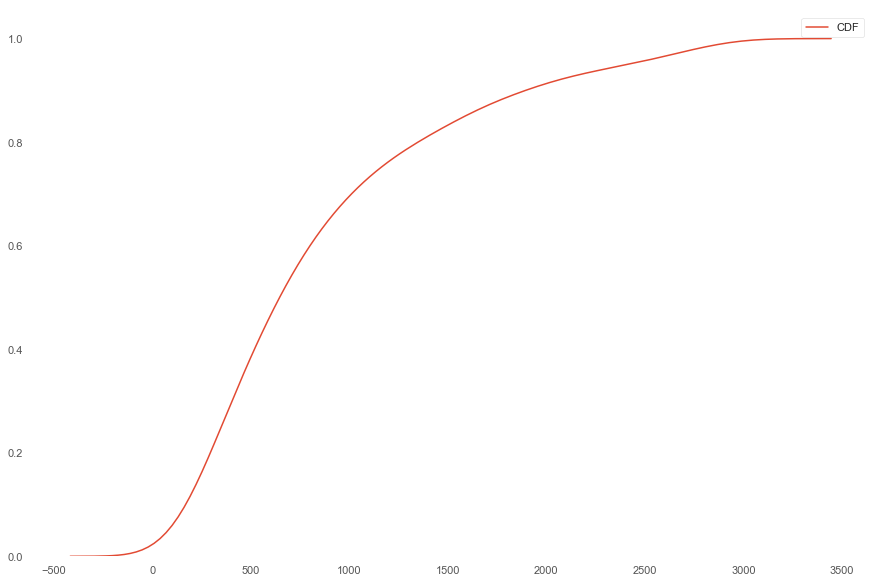

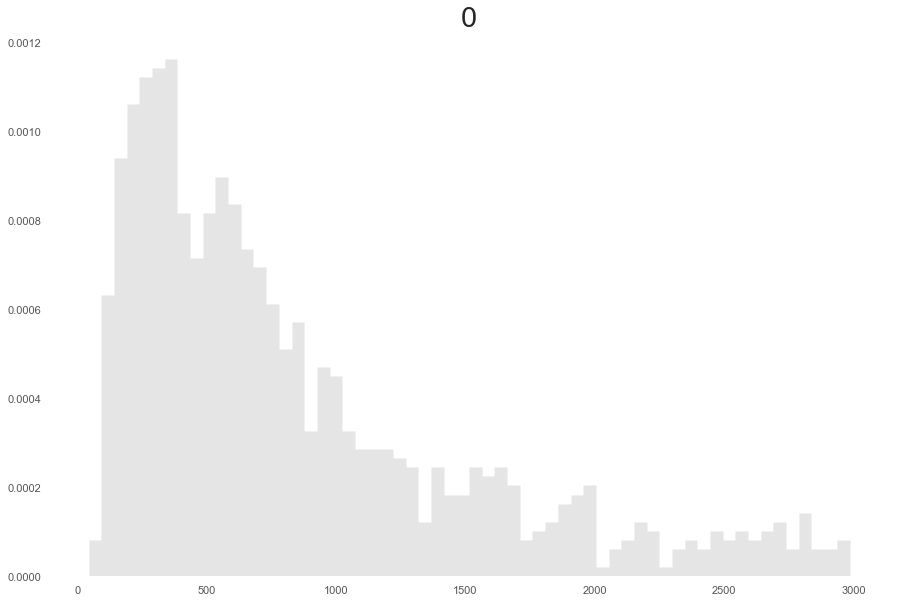

In [64]:
_ = sns.kdeplot(server_data[0], cumulative=True, label='CDF')
server_data.hist(bins=60, density=True, alpha=0.2, color='grey', sharex=True)


The above figure combines both the histogram and the KDE, as well as our CDF.

Several interesting observations can be read directly from the plot of the CDF. 

In the tail of the distribution at *t* = 1,500, the CDF is still smaller than 0.85; this means that 15 percent of all requests take longer than 1,500 milliseconds. 

In contrast, less than a third of all requests are completed in the *typical* range of 150–500 milliseconds. 

How do we arrive at this? 

The CDF for t = 150 is about 0.05 and is close to 0.40 for t = 500. In other words, about 40 percent of all requests are completed in less than 500 milliseconds; of these, 5 percent are completed in less than 150 milliseconds. Hence about 35 percent of all requests have response times of between 150 and 500 milliseconds.

It is worth pausing to contemplate these findings, because **they demonstrate how misleading a histogram (or KDE) can be despite (or because of) their intuitive appeal!**

Judging from the histogram or KDE alone, it seems quite reasonable to assume that “most” of the events occur within the major peak near t = 300 and that the tail for t > 1,500 contributes relatively little. 

Yet the CDF tells us clearly that this is not so. (The problem is that** the eye is much better at judging distances than areas, and we are therefore misled by the large values of the histogram near its peak and fail to see that nevertheless the area beneath the peak is not that large compared to the total area under the curve**.)

CDFs are probably the least well-known and most under appreciated tool in basic graphical analysis. They have less immediate intuitive appeal than histograms or KDEs, but they allow us to make the kind of quantitative statement that is very often required but is difficult (if not impossible) to obtain from a histogram.

CDFs have a number of important properties that follow directly from how they are calculated.

1. Because the value of the CDF at position x is the fraction of points to the left of x, a CDF is always monotonically increasing with x.
2. CDFs are less wiggly than a histogram (or KDE) but contain the same information in a representation that is inherently less noisy.
3. Because CDFs do not involve any binning, they do not lose information and are therefore a more faithful representation of the data than a histogram.
4. All CDFs approach 0 as x goes to negative infinity. CDFs are usually normalized so that they approach 1 (or 100 percent) as x goes to positive infinity.
5. A CDF is unique for a given data set.

Cumulative distribution functions have several uses:

1. they enable us to answer questions such as those posed earlier in this section: what fraction of points falls between any two values? The answer can simply be read off from the graph.
2. they help us understand how imbalanced a distribution is—in other words, what fraction of the overall weight is carried by the tails.
3. CDFs also prove useful when we want to compare two distributions. It is notoriously difficult to compare two bell-shaped curves in a histogram against each other. Comparing the corresponding CDFs is usually much more conclusive.




# Only When Appropriate: Summary Statistics and BoxPlots

So far not much has been said on such simple topics as mean and median, standard deviation, and percentiles. This has been quite intentional. 

These summary statistics apply only under certain assumptions and are misleading if those assumptions are not fulfilled. 

Mean, median, and related summary statistics apply only to distributions that have a
single, central peak — that is, to unimodal distributions.

## Summary Statistics

If a distribution has only a **single peak**, then it makes sense to ask about the properties of
that peak: where is it located, and what is its width? 

We may also want to know whether the distribution is symmetric and whether any outliers are present.

**Mean and standard deviation are easy to calculate**, and have certain nice mathematical
properties — **provided the data is symmetric and does not contain extreme outliers**.

Unfortunately, **many data sets violate at least one of these assumptions**. 

By calling *describe()* on a data frame with numerical values, we can very easily extract most of the simple summary statistics.

In [37]:
server_data.describe()


,0
count,1000.000000
mean,849.188570
std,675.909154
min,44.500000
25%,347.265000
50%,630.940000
75%,1125.880000
max,2985.290000


## Box and Whisker Plots

There is an interesting **graphical way to represent the summary statistics**, together with
information about potential **outliers**. This plot is known as a box-and-whisker plot, or box plot for short.

Figure below illustrates the components of a box plot on the server data. 

A box plot consists of:

1. A marker or symbol for the median as an indicator of the location of the distribution
2. A box, spanning the inter-quartile range, as a measure of the width of the distribution
3. A set of whiskers, extending from the central box to the upper and lower adjacent values, as an indicator of the tails of the distribution (where “adjacent value” is defined below)
4. Individual symbols for all values outside the range of adjacent values, as a representation for outliers

While the inter-quartile range is a measure for the width of the central
“bulk” of the distribution, the adjacent values are one possible way to express how far its
tails reach. The upper adjacent value is the largest value in the data set that is less than
twice the inter-quartile range greater than the median. In other words: extend the
whisker upward from the median to twice the length of the central box. Now trim the
whisker down to the largest value that actually occurs in the data set; this value is the
upper adjacent value. (A similar construction holds for the lower adjacent value.)

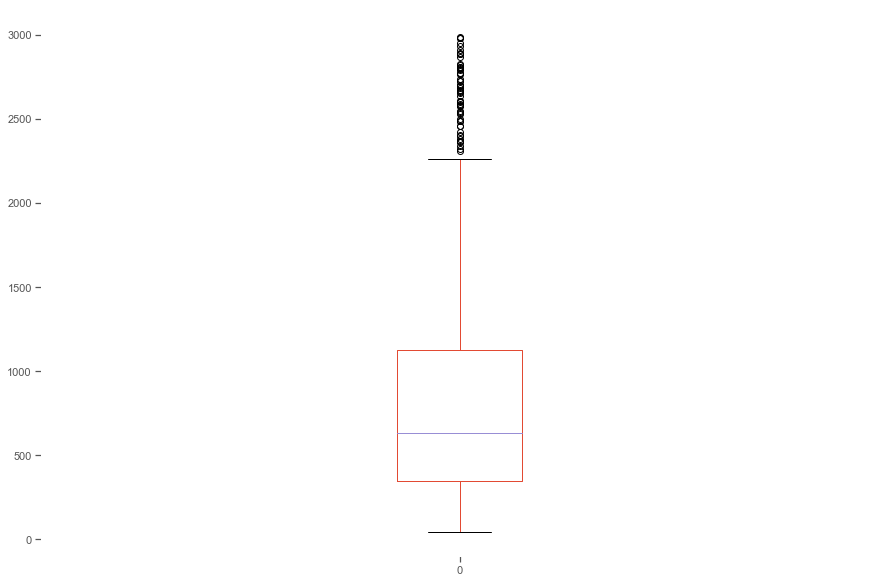

In [38]:
_ = server_data.boxplot()


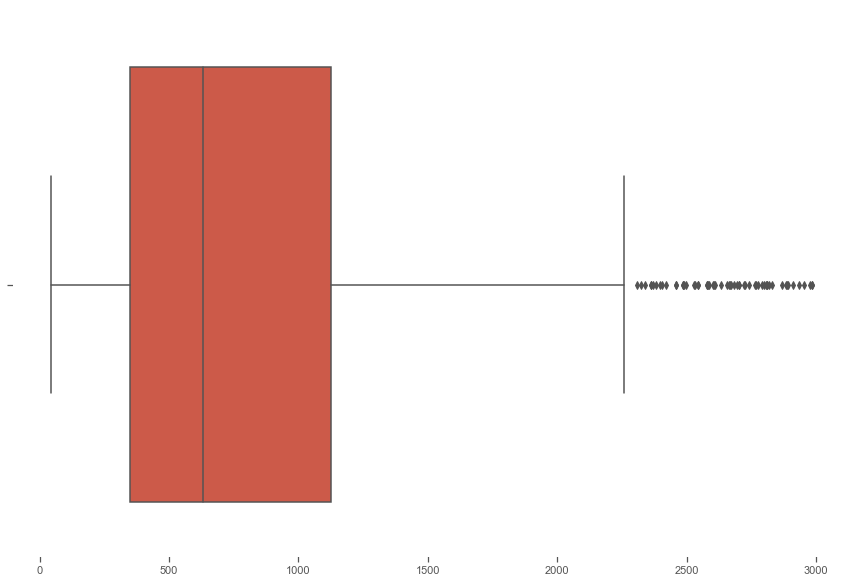

In [39]:
sns.boxplot(server_data)


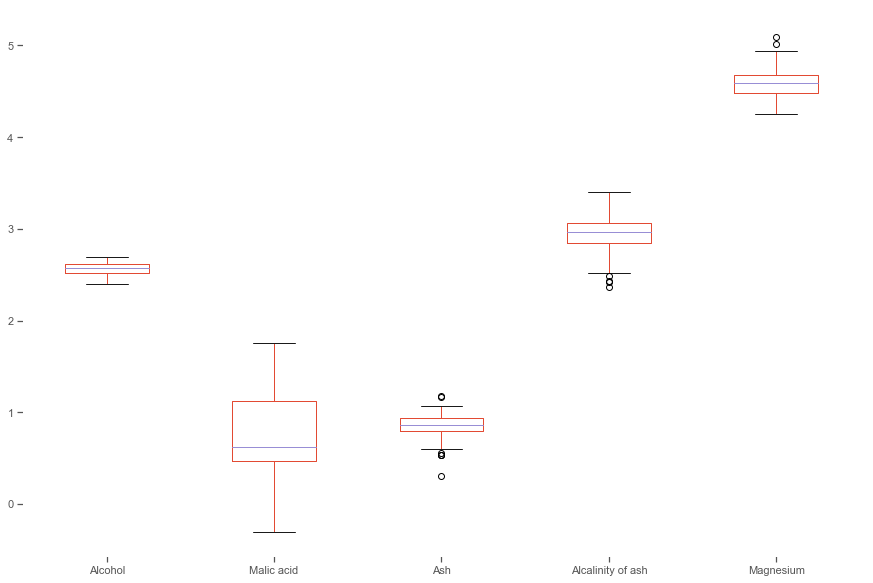

In [40]:
np.log(wine_data.loc[:,'Alcohol':]).plot(kind='box')


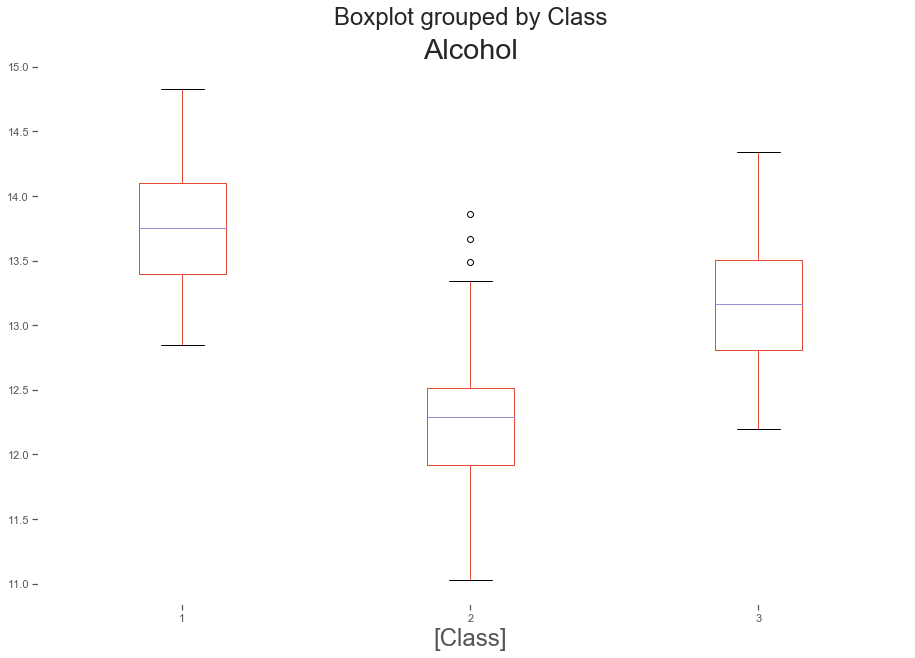

In [41]:
wine_data[['Class','Alcohol']].boxplot(by='Class')

**Exercise:** Generate a box-and-whisker plot on the Wine dataset for the Malic acid feature, and generating the distributions by class label.

**Exercise:** Plot a vertical set of boxplot with superimposed points as above on the tips dataset, showing the distribution of tip percentages by sex:

We can add a third dimension again using hue:

Text(0.5, 0, 'Day')

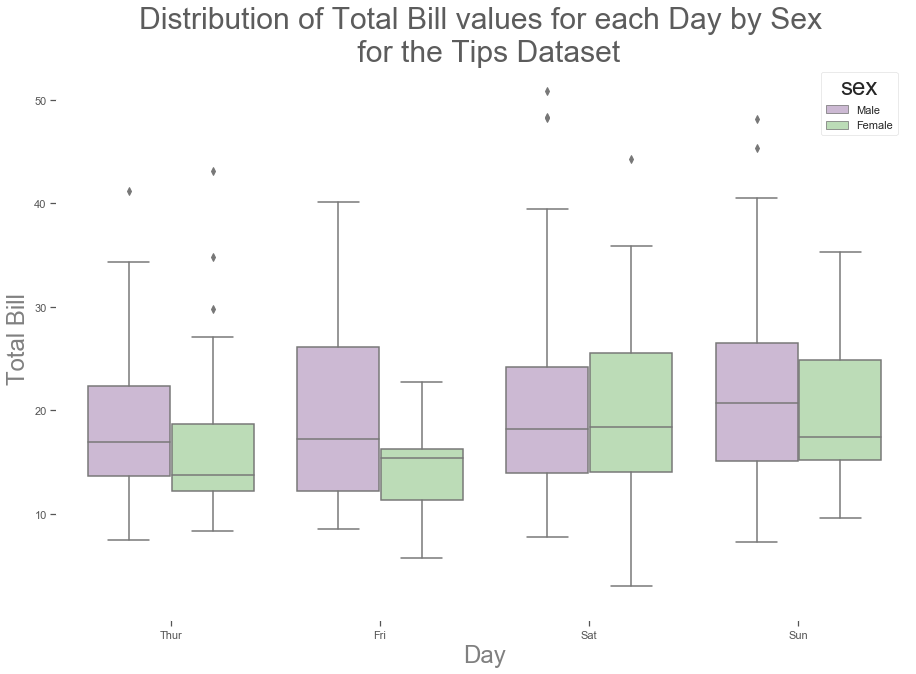

In [42]:
#rcParams['figure.figsize'] = 15, 10
# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")
sns.despine(offset=10, trim=True)

plt.title('Distribution of Total Bill values for each Day by Sex \n for the Tips Dataset', alpha=0.75, fontsize=30)
plt.ylabel('Total Bill', alpha=0.75)
plt.xlabel('Day', alpha=0.75)


In [43]:
# Draw a nested violinplot and split the violins for easier comparison
sns.set(style="whitegrid", palette="pastel", color_codes=True)


A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

Text(0.5, 0, 'Day')

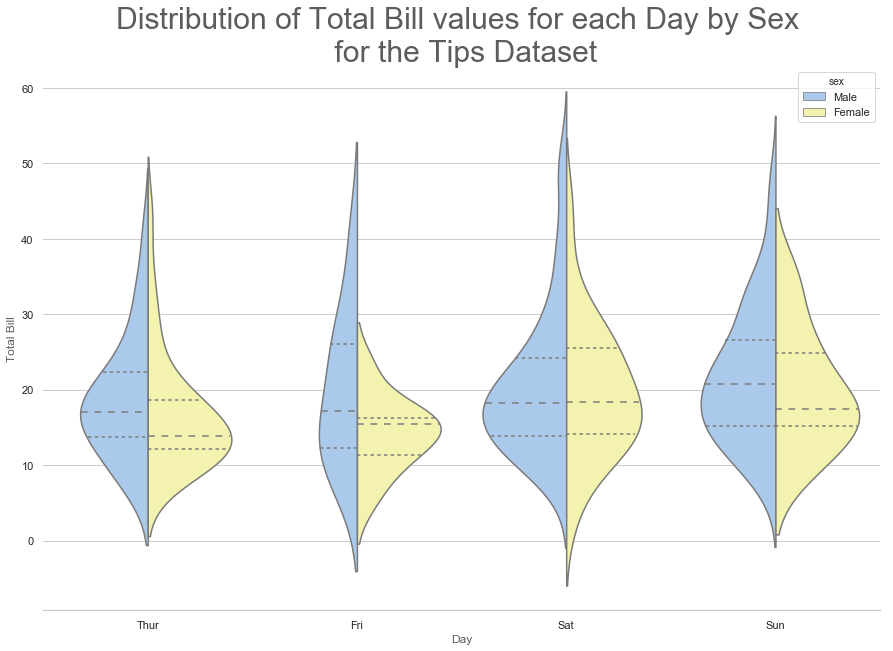

In [44]:
fig, ax = plt.subplots(figsize=(15,10))
rcParams['font.size'] = 20
sns.violinplot(ax=ax, x="day", y="total_bill", hue="sex", data=tips, split=True,
               inner="quart", palette={"Male": "b", "Female": "y"})
sns.despine(left=True)
plt.title('Distribution of Total Bill values for each Day by Sex \n for the Tips Dataset', alpha=0.75, fontsize=30)
plt.ylabel('Total Bill', alpha=0.75)
plt.xlabel('Day', alpha=0.75)


## Bar Graphs

In [45]:
matplotlib.style.use('ggplot')
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

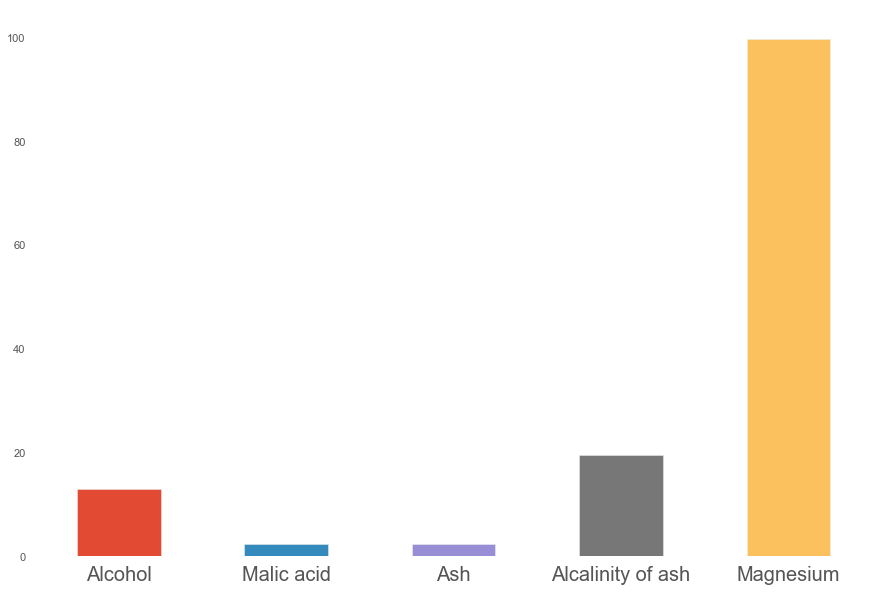

In [46]:
wine_data.loc[:,'Alcohol':].mean().plot(kind='bar')
plt.xticks(rotation=0, fontsize=20)

FactorPlots draw a categorical plot onto a FacetGrid.

The default plot that is shown is a point plot, but other seaborn categorical plots can be chosen with the kind parameter, including box plots, violin plots, bar plots, or strip plots.

It is important to choose how variables get mapped to the plot structure such that the most important comparisons are easiest to make. As a general rule, it is easier to compare positions that are closer together, so the hue variable should be used for the most important comparisons.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


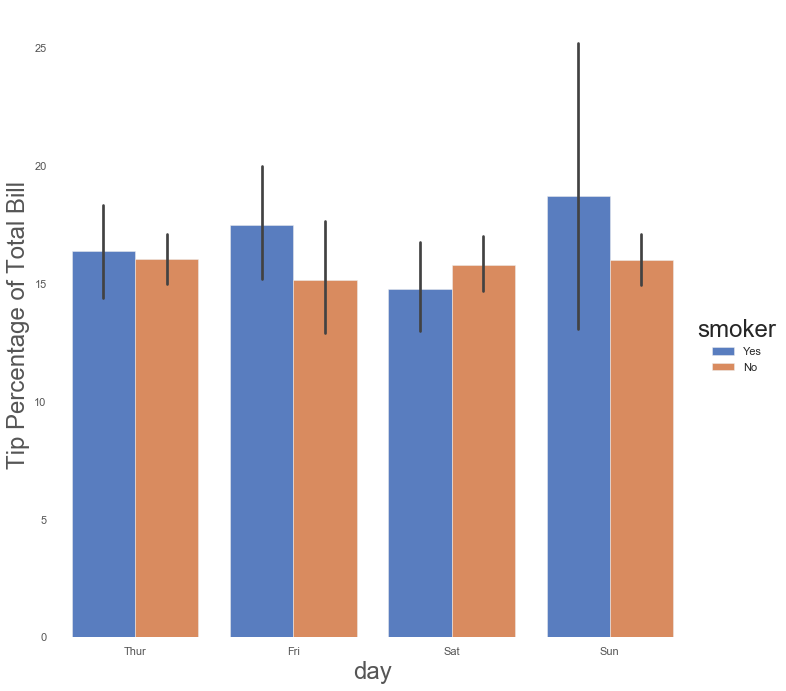

In [47]:
# Draw a nested barplot to show survival for class and sex
ax = sns.catplot(x="day", y="percentage", hue="smoker", data=tips,
                   height=10, kind="bar", palette="muted")
ax.despine(left=True)
ax.set_ylabels("Tip Percentage of Total Bill")


,total_bill,tip,sex,smoker,day,time,size,percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
5,25.29,4.71,Male,No,Sun,Dinner,4,18.623962
6,8.77,2.00,Male,No,Sun,Dinner,2,22.805017
7,26.88,3.12,Male,No,Sun,Dinner,4,11.607143
8,15.04,1.96,Male,No,Sun,Dinner,2,13.031915
9,14.78,3.23,Male,No,Sun,Dinner,2,21.853857


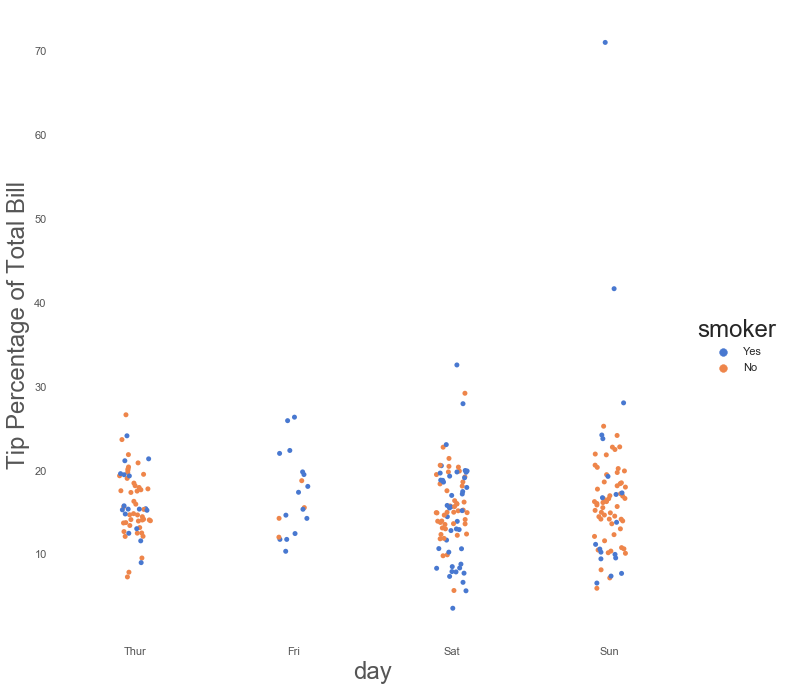

In [48]:
ax = sns.catplot(x="day", y="percentage", hue="smoker", data=tips,
                   height=10, kind="strip", palette="muted")
ax.despine(left=True)
ax.set_ylabels("Tip Percentage of Total Bill")
tips

## Scatter Plots

Scatter plots show us relationships between variables.

In [49]:
tips.columns


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'percentage'],
      dtype='object')

Text(0.5, 0, 'Tip')

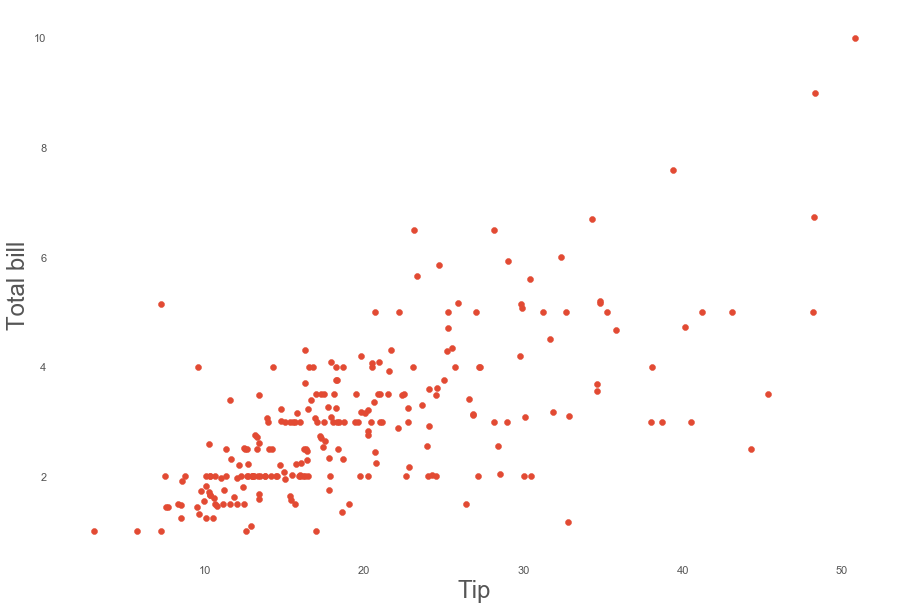

In [50]:
plt.scatter(tips.total_bill, tips.tip)
plt.ylabel('Total bill')
plt.xlabel('Tip')


We can plot a third variable as a density of the individual dots.

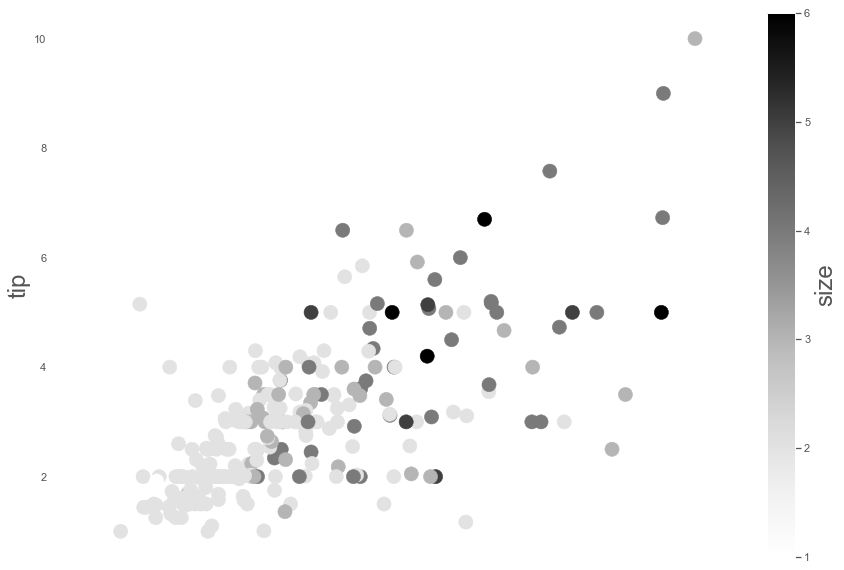

In [51]:
tips.plot(kind='scatter', x='total_bill', y='tip', c='size', s=200);
#plt.ylabel('Tip')
#plt.xlabel('Total bill')

Likewise, we can also plot a third variable as the volume of the dots:

Text(0.5, 0, 'Total bill')

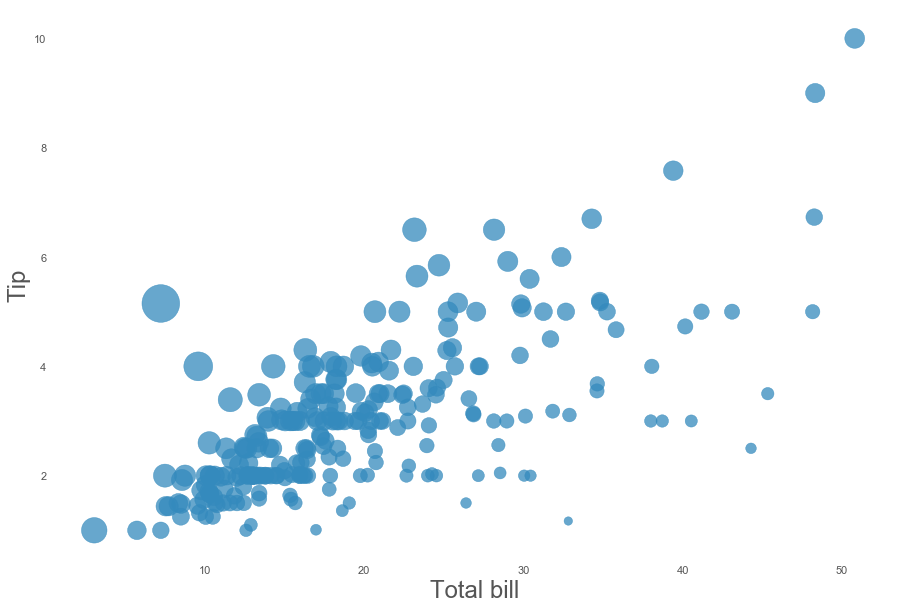

In [52]:
tips.plot(kind='scatter', x='total_bill', y='tip', s=tips['percentage']*20, alpha=0.75);
plt.ylabel('Tip')
plt.xlabel('Total bill')

In [53]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()
p2 = figure(title="Total bill, Tip Amount and Tip Percentage")
p2.scatter(tips.total_bill, tips.tip, color='#A6CEE3', legend='Tip Percentage',size=tips.percentage,alpha=.75)

p2.grid.grid_line_alpha=0.3
p2.xaxis.axis_label = 'Total bill'
p2.yaxis.axis_label = 'Tip'
show(p2)


Loading BokehJS ...

**Exercise:** Plot a scatter plot on the Wine dataset, showing Alcohol and Ash on the x and y axes, and Alcalinity of ash reflected as the size of the dots.:

**Exercise:** Render the previous plot in Bokeh as an interactive plot:

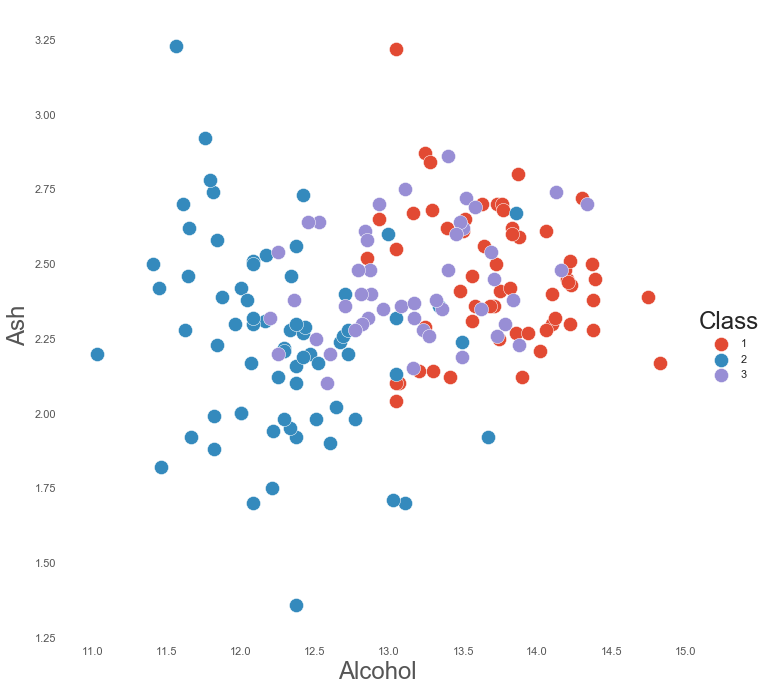

In [54]:
g = sns.FacetGrid(wine_data,  hue="Class", height=10)
g.map(plt.scatter, "Alcohol", "Ash", s=200, edgecolor="w").add_legend()


Referring back to the FacetGrids shown earlier using histograms, by using hue we can represent the third variable and generate scatter plots instead: 

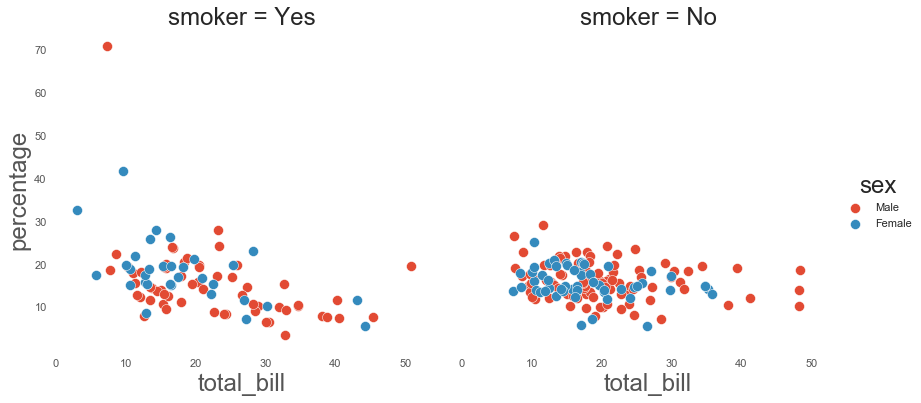

In [55]:
g = sns.FacetGrid(tips, col="smoker",  hue="sex", height=6)
g.map(plt.scatter, "total_bill", "percentage", s=100, edgecolor="w").add_legend()


**Exercise:** Plot a FacetGrid figure depicting the relationship between the total bill and the tip size, split into two graphs based on sex, a scatter plot:

# Plotting Multivariate data 

Often we would like to see the if relationships exist between different features within a dataset. One such plot that can be  easily generated to display correlations between all features in a pair-wise manner is a scatter matrix plot.

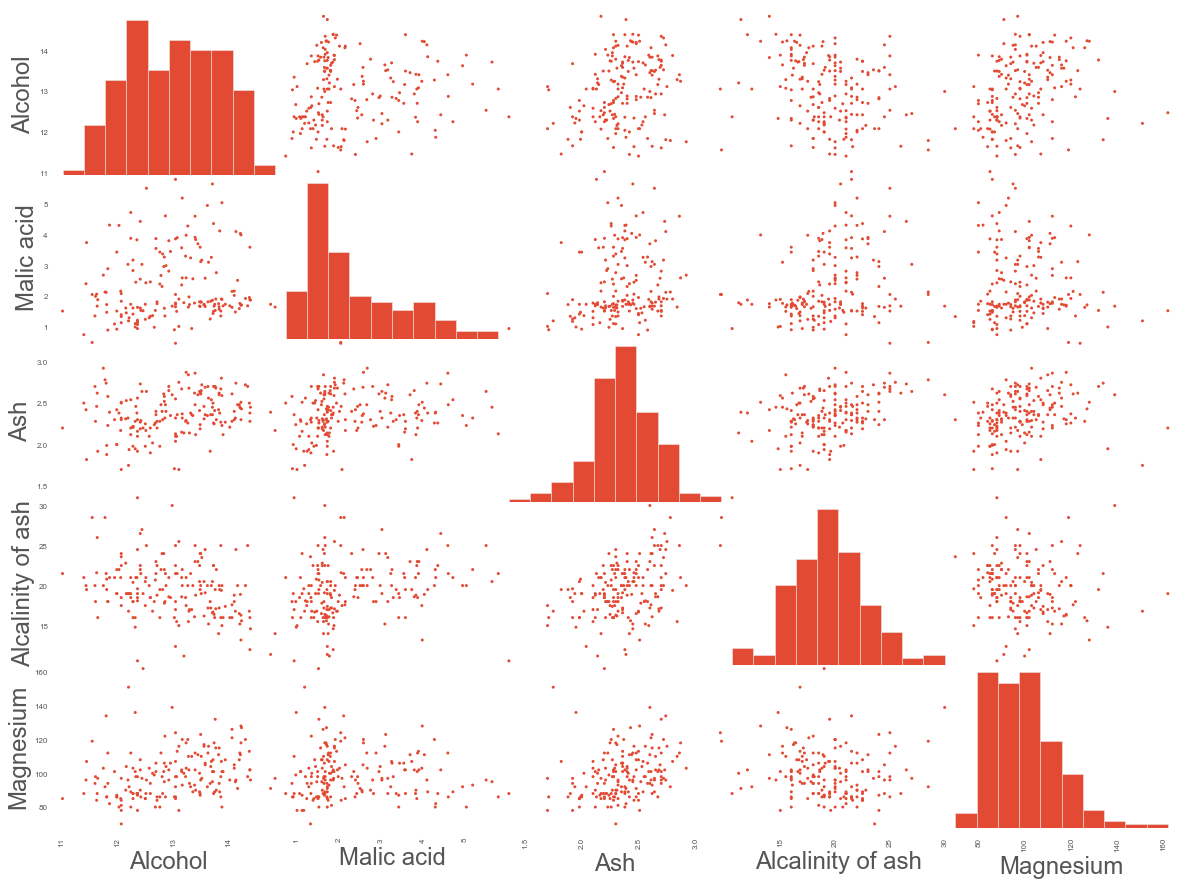

In [56]:
_ = pd.plotting.scatter_matrix(wine_data[wine_data.columns[1:6]], alpha=1, figsize=(20, 15), diagonal='hist')


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


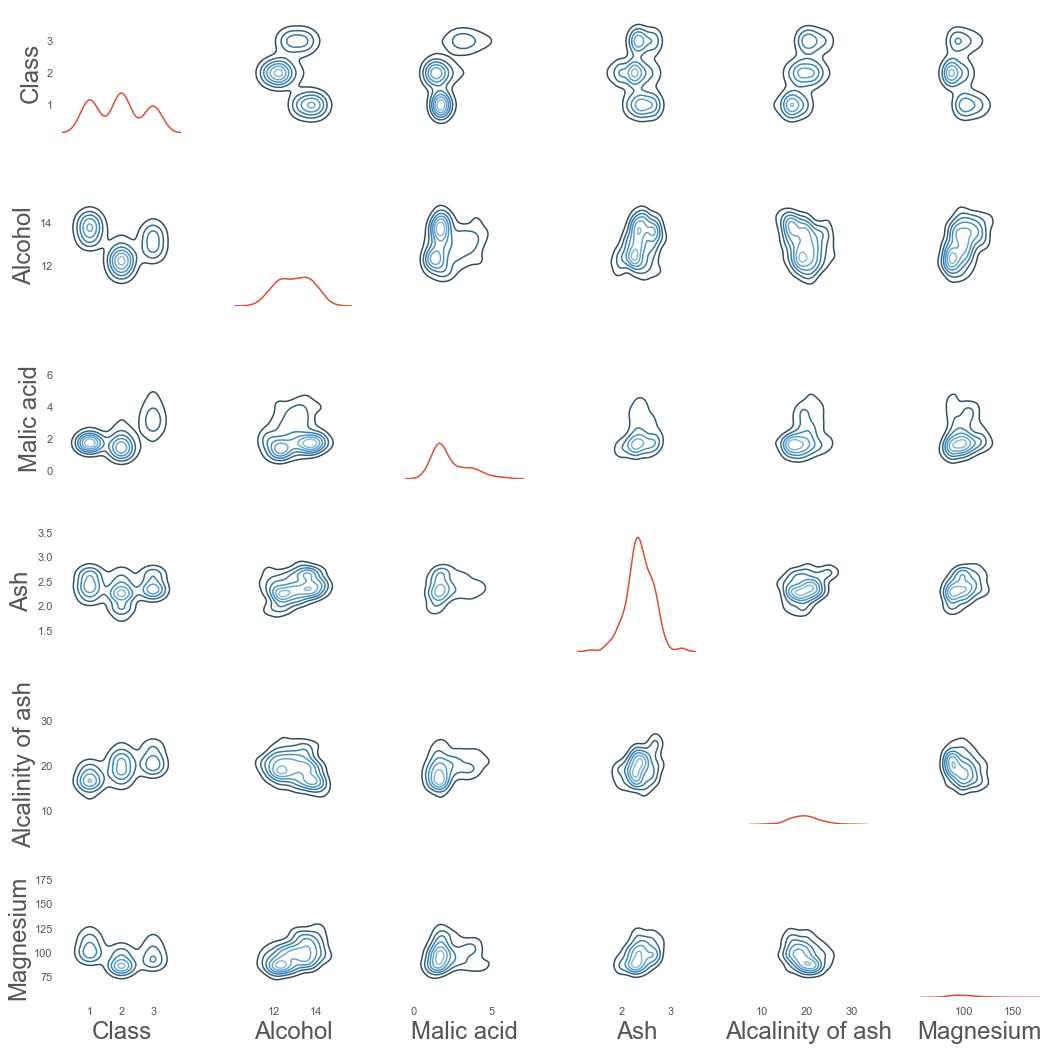

In [57]:
#pd.tools.plotting.scatter_matrix(wine_data[wine_data.index[1:6]], alpha=1, figsize=(20, 15), diagonal='hist')

g = sns.PairGrid(wine_data)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);


A simple plot showing the strength of relationship between two features can be rendered below using seaborn's jointplot. This results in a combination of a scatter plot between two variables, a regression line (with a confidence interval) as well as the Pearson's correlation coefficient that indicates the strength of the linear relationship, together with the histograms and the KDE's of each feature.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


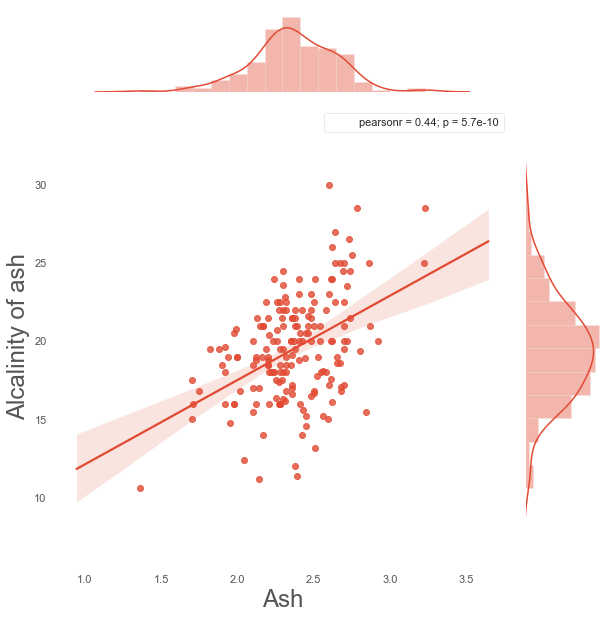

In [58]:
import scipy.stats as stats

j = sns.jointplot("Ash", "Alcalinity of ash", wine_data, kind='reg', height=9);
j.annotate(stats.pearsonr)


The symbol for Pearson's correlation is "ρ" when it is measured in the population and "r" when it is measured in a sample. 

Pearson's correlation coefficient can range from -1 to 1. An r of -1 indicates a perfect negative linear relationship between variables, an r of 0 indicates no linear relationship between variables, and an r of 1 indicates a perfect positive linear relationship between variables. 

**Exercise:** Select a pair of features from the above example and generate a jointplot on them.

---

---

---

---


# Reference material

### 3d Plotting 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


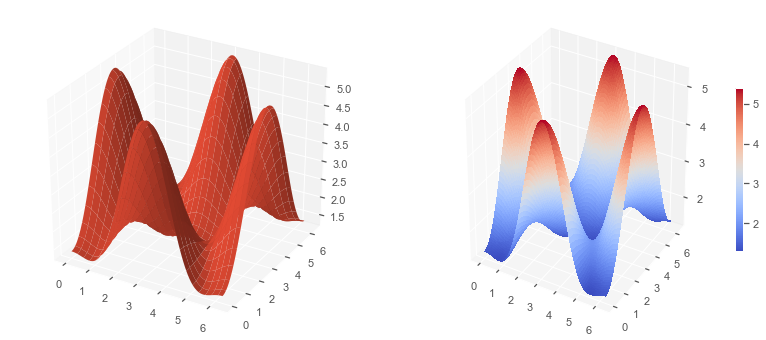

In [59]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
from numpy import *
import matplotlib as mpl

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * cos(phi_p)*cos(phi_m) - alpha * cos(phi_ext - 2*phi_p)

fig = plt.figure(figsize=(14,6))

alpha = 0.7
phi_ext = 2 * pi * 0.5


phi_m = linspace(0, 2*pi, 100)
phi_p = linspace(0, 2*pi, 100)
X,Y = meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=mpl.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

fig.show()


matplotlib is a relatively low-level plotting package, relative to others. It makes very few assumptions about what constitutes good layout (by design), but has a lot of flexibility to allow the user to completely customize the look of the output.

### Setting Plot Parameters and annotating

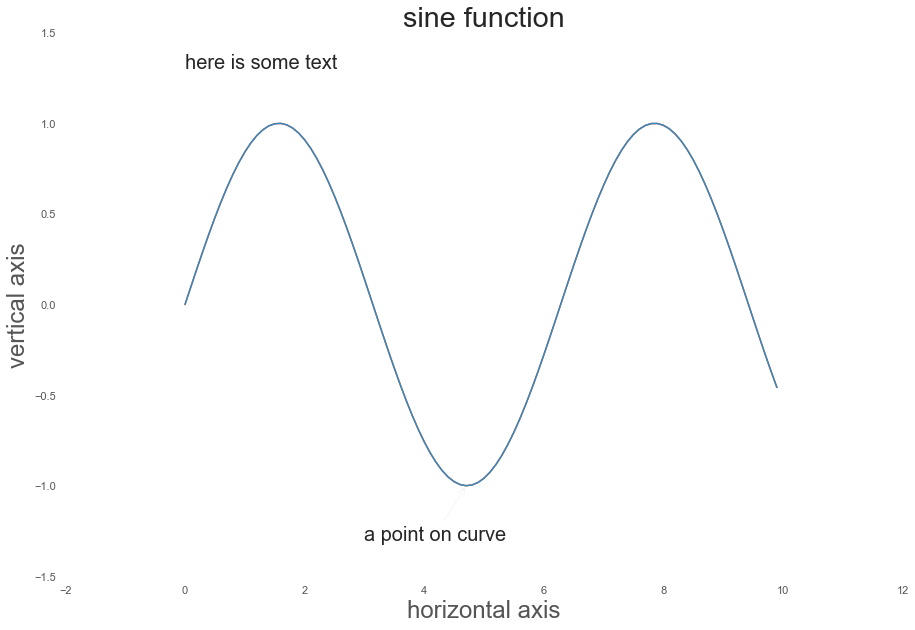

In [60]:
x = arange(0.,10.,0.1) # generate a range of values as an array, using begin, end, step as input 
y = sin(x)
ll = plt.plot(x,y)
xl = plt.xlabel('horizontal axis')
yl = plt.ylabel('vertical axis')
ttl = plt.title('sine function')
ax = plt.axis([-2, 12, -1.5, 1.5])
grd = plt.grid(True)
txt = plt.text(0,1.3,'here is some text')
ann = plt.annotate('a point on curve',xy=(4.7,-1),xytext=(3,-1.3),arrowprops=dict(arrowstyle='->'))
line = plt.plot(x,y)[0]

#to set markers on the points
#line.set_marker('o')

#save file
plt.savefig('sine_function.png',dpi=150)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'Model length' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'Data length' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning: Legend does not support 'Total message length' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig

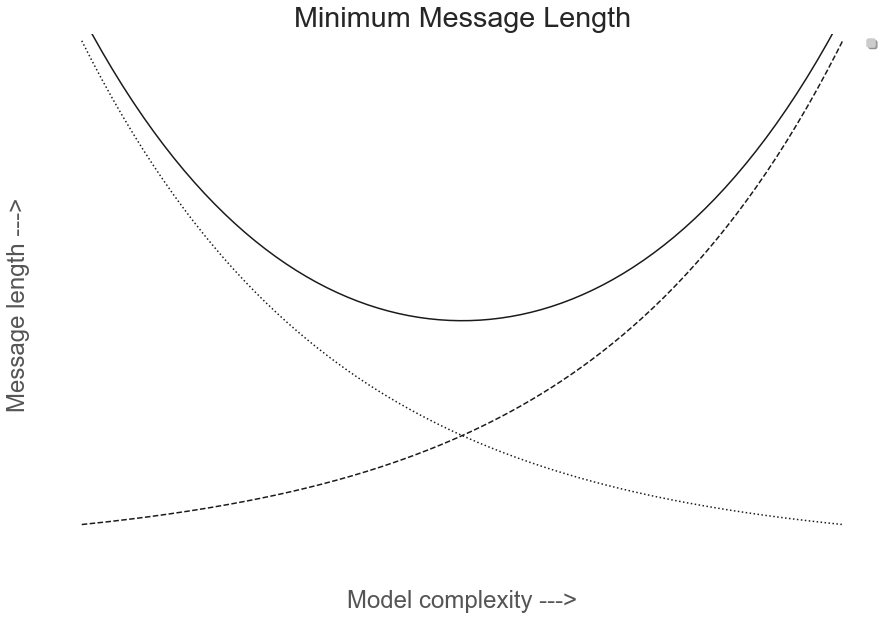

In [61]:
a = arange(0,3,.02)
b = arange(0,3,.02)
c = exp(a)
d = c[::-1]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(a,c,'k--',a,d,'k:',a,c+d,'k')
leg = ax.legend(('Model length', 'Data length', 'Total message length'),
           'upper center', shadow=True)
ax.set_ylim([-1,20])
ax.grid(True)
ax.set_xlabel('Model complexity --->')
ax.set_ylabel('Message length --->')
ax.set_title('Minimum Message Length')

ax.set_yticklabels([])
ax.set_xticklabels([])

# set some legend properties.  All the code below is optional.  The
# defaults are usually sensible but if you need more control, this
# shows you how

# the matplotlib.patches.Rectangle instance surrounding the legend
frame  = leg.get_frame()
frame.set_facecolor('0.80')    # set the frame face color to light gray

# matplotlib.text.Text instances
for t in leg.get_texts():
    t.set_fontsize('small')    # the legend text fontsize

# matplotlib.lines.Line2D instances
for l in leg.get_lines():
    l.set_linewidth(1.5)  # the legend line width
plt.show()


---

---

In [62]:
%%javascript
require(['base/js/utils'],
function(utils) {
   utils.load_extensions('calico-spell-check', 'calico-document-tools', 'calico-cell-tools');
});

<IPython.core.display.Javascript object>